# Polynomial Linear Regression

Prediksi harga rumah dengan Polynomial Linear Regression

## Load Boston

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print( "type of boston = ", type(boston))

type of boston =  <class 'sklearn.utils.Bunch'>


In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Sample Dataset

#### Training Dataset

In [17]:
import pandas as pd
import numpy as np

rumah = {'kamar': [2, 4, 6, 8, 10], 
         'pajak': [2, 1, 0, 2, 0],
         'harga': [7, 9, 13, 17.5, 18]}

train_rumah_df = pd.DataFrame(rumah)
train_rumah_df

,kamar,pajak,harga
0,2,2,7.0
1,4,1,9.0
2,6,0,13.0
3,8,2,17.5
4,10,0,18.0


#### Testing Dataset

In [18]:
rumah = {'kamar': [4, 6, 8, 10, 12], 
         'pajak': [2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}

test_rumah_df = pd.DataFrame(rumah)
test_rumah_df

,kamar,pajak,harga
0,4,2,11.0
1,6,0,8.5
2,8,2,15.0
3,10,2,18.0
4,12,0,11.0


## Polynomial Regression: Quadratic

#### Polynomial Features

In [23]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   2.   4.]
 [  1.   4.  16.]
 [  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]]



#### Training Model

In [24]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

#### Visualisasi Model

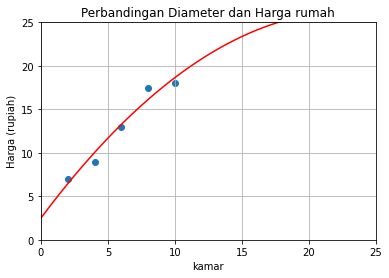

In [25]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga rumah')
plt.xlabel('kamar')
plt.ylabel('Harga (rupiah)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

#### Polynomial Regression: Quadratic vs Cubic

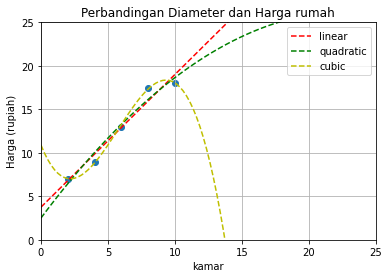

In [26]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga rumah')
plt.xlabel('kamar')
plt.ylabel('Harga (rupiah)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()